# Kode ini disusun oleh Yudhi Ahmadi, Kode ini dibuat oleh penyusun dari waktu masih menjadi mentor metocean data analyst di IPB University hingga sekarang

In [ ]:
!wget -q https://github.com/pydap/pydap/archive/refs/tags/3.3.0.tar.gz

In [ ]:
!sudo tar -xvf /content/3.3.0.tar.gz

pydap-3.3.0/
pydap-3.3.0/.coveragerc
pydap-3.3.0/.github/
pydap-3.3.0/.github/workflows/
pydap-3.3.0/.github/workflows/python.yml
pydap-3.3.0/.github/workflows/python_macos.yml
pydap-3.3.0/.gitignore
pydap-3.3.0/CODE_OF_CONDUCT.md
pydap-3.3.0/CONTRIBUTORS.md
pydap-3.3.0/LICENSE
pydap-3.3.0/MANIFEST.in
pydap-3.3.0/NEWS.md
pydap-3.3.0/README.md
pydap-3.3.0/TODO
pydap-3.3.0/bootstrap.py
pydap-3.3.0/buildout.cfg
pydap-3.3.0/conftest.py
pydap-3.3.0/docs/
pydap-3.3.0/docs/Makefile
pydap-3.3.0/docs/Special chars.odt
pydap-3.3.0/docs/_static/
pydap-3.3.0/docs/_static/default.css
pydap-3.3.0/docs/client.rst
pydap-3.3.0/docs/conf.py
pydap-3.3.0/docs/developer.rst
pydap-3.3.0/docs/developer_data_model.rst
pydap-3.3.0/docs/developer_handlers.rst
pydap-3.3.0/docs/developer_responses.rst
pydap-3.3.0/docs/developer_templating.rst
pydap-3.3.0/docs/handlers.rst
pydap-3.3.0/docs/index.rst
pydap-3.3.0/docs/license.rst
pydap-3.3.0/docs/make.bat
pydap-3.3.0/docs/responses.rst
pydap-3.3.0/docs/server.rst
py

In [ ]:
cd /content/pydap-3.3.0

/content/pydap-3.3.0


In [ ]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:955: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated.
!!

        ********************************************************************************
        Please replace its usage with implicit namespaces (PEP 420).

        See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages for details.
        ********************************************************************************

!!
  ep.load()(self, ep.name, value)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setu

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import getpass
import pandas as pd

%matplotlib inline

In [ ]:
USERNAME = 'yahmadi'
PASSWORD = getpass.getpass('Enter your password: ')
DATASET_ID = 'cmems_mod_glo_phy-cur_anfc_0.083deg_P1M-m'
#cmems_mod_glo_phy-so_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy-cur_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy_my_0.083_P1M-m

Enter your password: ··········


In [ ]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2022 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

In [ ]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [ ]:
import xarray as xr
ds = xr.open_dataset(data_store)
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 31)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-11-16 ... 2023-05-16T12:00:00
Data variables:
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/13)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    product:                       GLOBAL_ANALYSISFORECAST_PHY_001_024
    source:                        MERCATOR GLO12
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [ ]:
df2 = ds

In [ ]:
df_time = df2.sel(longitude=slice(104.323539, 106.722035), latitude=slice(-3.611028, -1.360058), time=slice('2020-01-01T00:00:00.000000000', '2023-12-31T12:00:00.000000000'), depth=4.940250e-01)
#104.323539  -1.360058
#106.722035  -3.611028

In [ ]:
df_time

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 27, time: 31)
Coordinates:
  * longitude  (longitude) float32 104.3 104.4 104.5 104.6 ... 106.5 106.6 106.7
  * latitude   (latitude) float32 -3.583 -3.5 -3.417 ... -1.583 -1.5 -1.417
    depth      float32 0.494
  * time       (time) datetime64[ns] 2020-11-16 ... 2023-05-16T12:00:00
Data variables:
    uo         (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes: (12/13)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    product:                       GLOBAL_ANALYSISFORECAST_PHY_001_024
    source:                        MERCATOR GLO12
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [ ]:
seasonal_data = df_time.groupby('time.season')
seasonal_average = seasonal_data.mean(dim='time')

In [ ]:
seasonal_average.to_dataframe().to_csv('data.csv')

In [ ]:
import numpy as np
df = pd.read_csv('/content/data.csv')
df2 = df.dropna().drop(['depth'], axis=1)
data2 = df2[~df2['season'].isin(df2)]
data2 = data2.reset_index(drop=True)
data2['speed(m/s)'] = data2.apply(lambda row: np.sqrt(row['uo']**2 + row['vo']**2), axis=1)
data2['direction'] = data2.apply(lambda row: np.mod(180+180/np.pi*(np.arctan2(row['vo'], row['uo'])),360), axis=1)

In [ ]:
data2.to_csv('Arcgis.csv')

In [ ]:
import pandas as pd
df= pd.read_csv('/content/Arcgis.csv')
df2 = df.drop(['Unnamed: 0'], axis=1)
df2

,longitude,latitude,season,uo,vo,speed(m/s),direction
0,104.500000,-1.666664,DJF,0.015533,-0.027081,0.031220,119.836723
1,104.500000,-1.666664,JJA,-0.015552,0.022506,0.027357,304.645524
2,104.500000,-1.666664,MAM,0.004101,-0.005560,0.006908,126.409758
3,104.500000,-1.666664,SON,-0.001986,0.001797,0.002678,317.870683
4,104.500000,-1.583328,DJF,0.018401,-0.025414,0.031376,125.907087
...,...,...,...,...,...,...,...
1383,106.666687,-1.500000,SON,0.077654,-0.043400,0.088959,150.799508
1384,106.666687,-1.416664,DJF,0.191004,-0.211672,0.285109,132.061804
1385,106.666687,-1.416664,JJA,-0.116632,0.115406,0.164078,315.302568
1386,106.666687,-1.416664,MAM,0.093890,-0.072341,0.118527,142.386063


In [ ]:
values_to_drop = ['JJA', 'MAM', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Barat.csv')

In [ ]:
values_to_drop = ['DJF', 'MAM', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Timur.csv')

In [ ]:
values_to_drop = ['DJF', 'JJA', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Peralihan1.csv')

In [ ]:
values_to_drop = ['DJF', 'JJA', 'MAM']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Peralihan2.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install oceans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
USERNAME = 'yahmadi'
PASSWORD = getpass.getpass('Enter your password: ')
DATASET_ID = 'cmems_mod_glo_phy_anfc_merged-uv_PT1H-i'

Enter your password: ··········


In [ ]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2022 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

In [ ]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [ ]:
ds = xr.open_dataset(data_store)
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 1, time: 23136)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494
  * time       (time) datetime64[ns] 2020-11-01T00:30:00 ... 2023-06-22T23:30:00
Data variables:
    utotal     (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
    utide      (time, depth, latitude, longitude) float32 ...
    vtide      (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    vsdx       (time, depth, latitude, longitude) float32 ...
    vsdy       (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         hourly mean merged surface currents from o...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLO12, mfwamglo, FES2014
    licence:                       http://marine.copernicus.eu/services-portf...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    institution:                   MERCATOR OCEAN

In [ ]:
u1 = ds.utotal
v1 = ds.vtotal
u = ds.utide
v = ds.vtide
u2 = ds.uo
v2 = ds.uo

waktu = ds.time

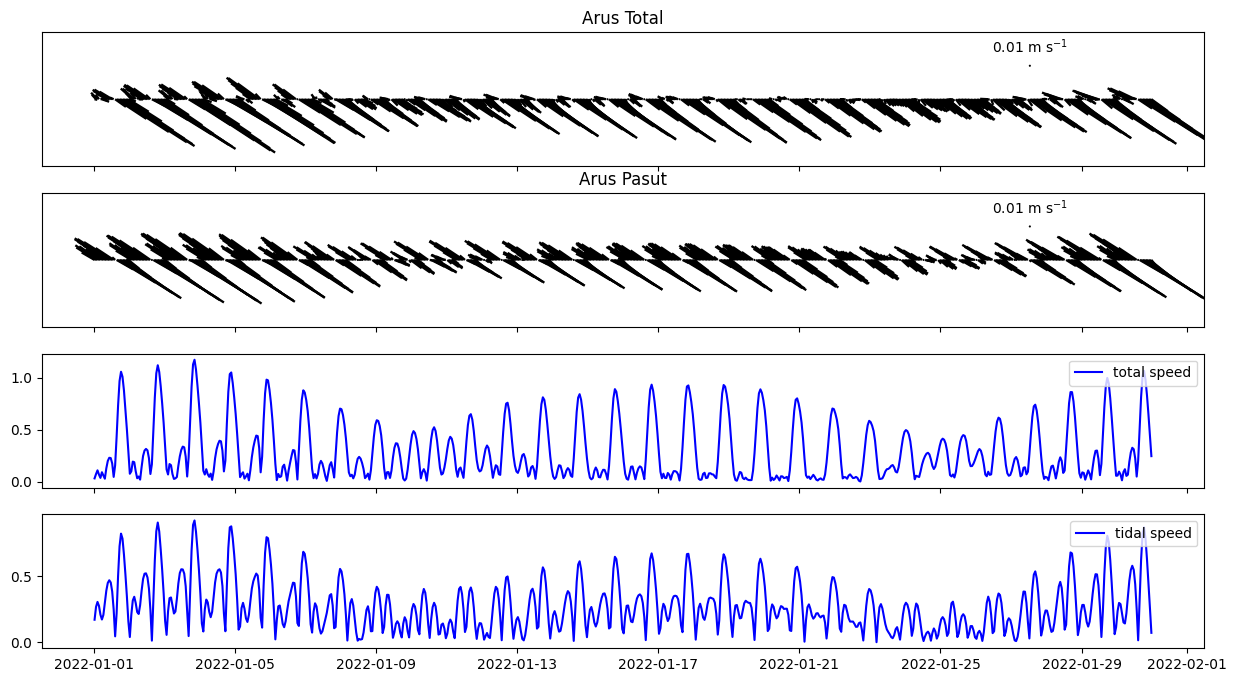

In [ ]:
import oceans.plotting as plot
import numpy as np
us = u1.sel(time=slice('2022-01-01T00:30:00.000000000','2022-01-30T23:30:00.000000000'))
vs = v1.sel(time=slice('2022-01-01T00:30:00.000000000','2022-01-30T23:30:00.000000000'))
us1 = u.sel(time=slice('2022-01-01T00:30:00.000000000','2022-01-30T23:30:00.000000000'))
vs1 = v.sel(time=slice('2022-01-01T00:30:00.000000000','2022-01-30T23:30:00.000000000'))
ws = waktu.sel(time=slice('2022-01-01T00:30:00.000000000','2022-01-30T23:30:00.000000000'))

us = us.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs = vs.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
us1 = us1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs1 = vs1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 8),sharex=True)
q = plot.stick_plot(ws, us, vs, ax=ax0)
qk = ax0.quiverkey(q, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

q2 = plot.stick_plot(ws, us1, vs1, ax=ax1)
qk = ax1.quiverkey(q2, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

l = ax2.plot(ws, np.sqrt(us**2 + vs**2), "-b", label='total speed')
l2 = ax3.plot(ws, np.sqrt(us1**2 + vs1**2), "-b", label='tidal speed')
ax0.set_title('Arus Total', loc='center')
ax1.set_title('Arus Pasut', loc='center')
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")

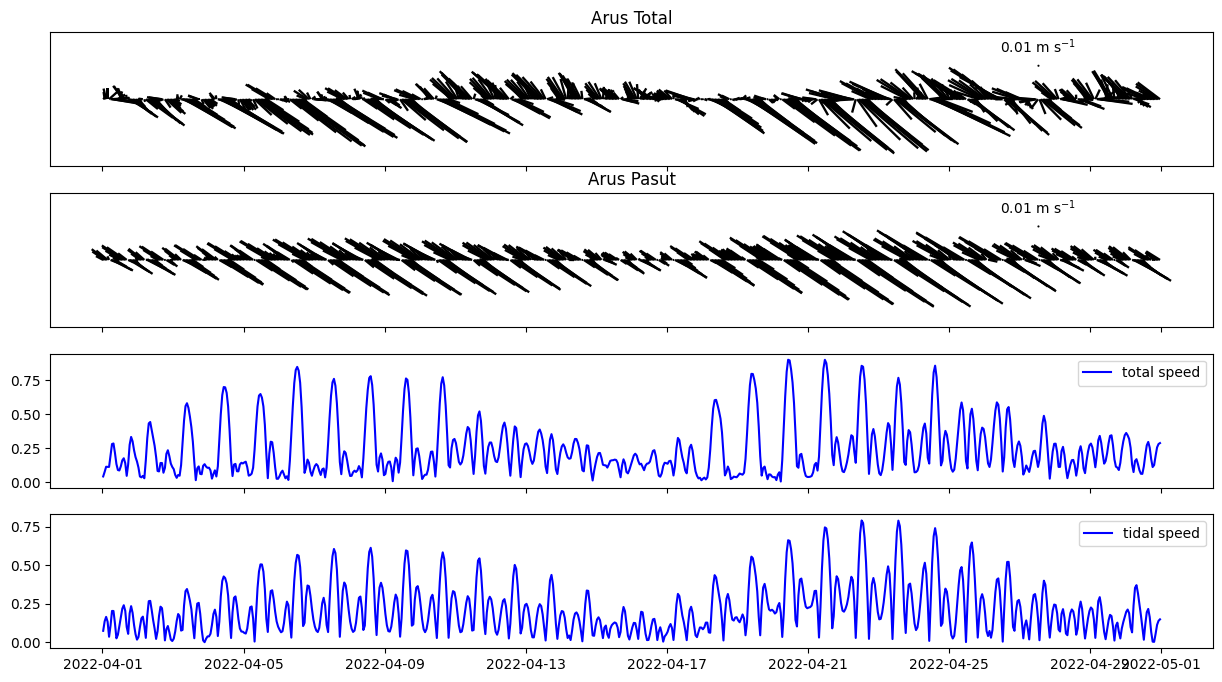

In [ ]:
import oceans.plotting as plot
import numpy as np
us = u1.sel(time=slice('2022-04-01T00:30:00.000000000','2022-04-30T23:30:00.000000000'))
vs = v1.sel(time=slice('2022-04-01T00:30:00.000000000','2022-04-30T23:30:00.000000000'))
us1 = u.sel(time=slice('2022-04-01T00:30:00.000000000','2022-04-30T23:30:00.000000000'))
vs1 = v.sel(time=slice('2022-04-01T00:30:00.000000000','2022-04-30T23:30:00.000000000'))
ws = waktu.sel(time=slice('2022-04-01T00:30:00.000000000','2022-04-30T23:30:00.000000000'))

us = us.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs = vs.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
us1 = us1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs1 = vs1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 8),sharex=True)
q = plot.stick_plot(ws, us, vs, ax=ax0)
qk = ax0.quiverkey(q, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

q2 = plot.stick_plot(ws, us1, vs1, ax=ax1)
qk = ax1.quiverkey(q2, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

l = ax2.plot(ws, np.sqrt(us**2 + vs**2), "-b", label='total speed')
l2 = ax3.plot(ws, np.sqrt(us1**2 + vs1**2), "-b", label='tidal speed')
ax0.set_title('Arus Total', loc='center')
ax1.set_title('Arus Pasut', loc='center')
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")

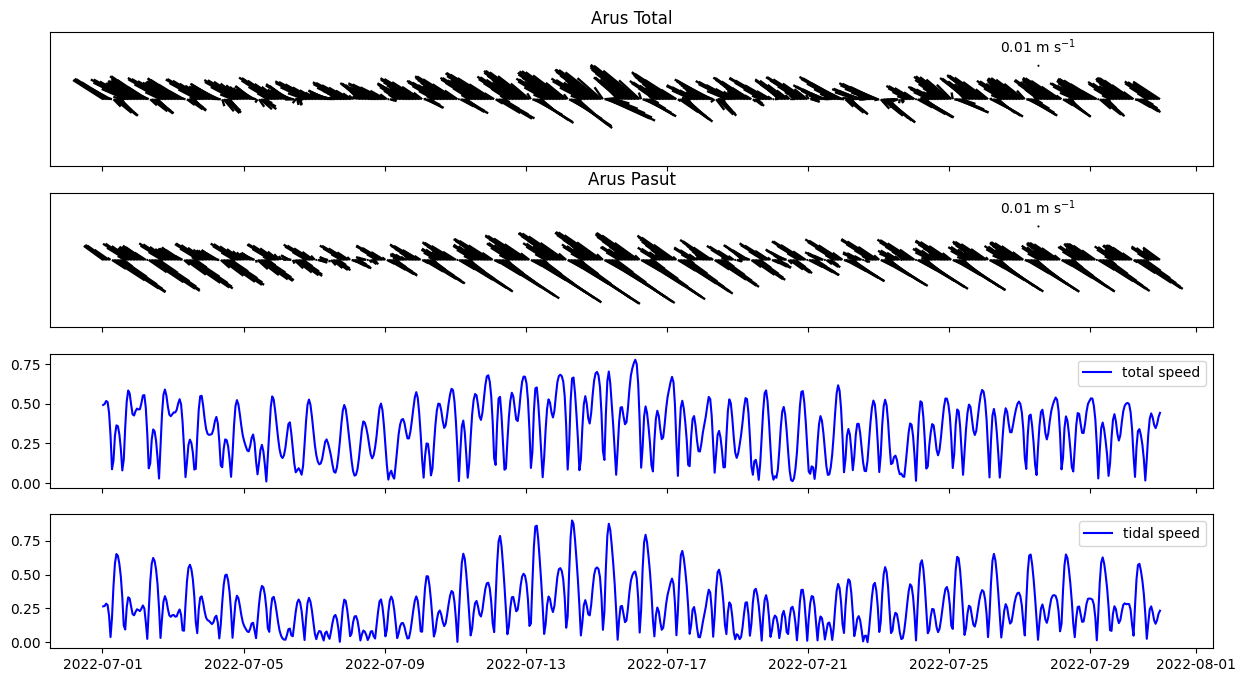

In [ ]:
import oceans.plotting as plot
import numpy as np
us = u1.sel(time=slice('2022-07-01T00:30:00.000000000','2022-07-30T23:30:00.000000000'))
vs = v1.sel(time=slice('2022-07-01T00:30:00.000000000','2022-07-30T23:30:00.000000000'))
us1 = u.sel(time=slice('2022-07-01T00:30:00.000000000','2022-07-30T23:30:00.000000000'))
vs1 = v.sel(time=slice('2022-07-01T00:30:00.000000000','2022-07-30T23:30:00.000000000'))
ws = waktu.sel(time=slice('2022-07-01T00:30:00.000000000','2022-07-30T23:30:00.000000000'))

us = us.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs = vs.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
us1 = us1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs1 = vs1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 8),sharex=True)
q = plot.stick_plot(ws, us, vs, ax=ax0)
qk = ax0.quiverkey(q, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

q2 = plot.stick_plot(ws, us1, vs1, ax=ax1)
qk = ax1.quiverkey(q2, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

l = ax2.plot(ws, np.sqrt(us**2 + vs**2), "-b", label='total speed')
l2 = ax3.plot(ws, np.sqrt(us1**2 + vs1**2), "-b", label='tidal speed')
ax0.set_title('Arus Total', loc='center')
ax1.set_title('Arus Pasut', loc='center')
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")

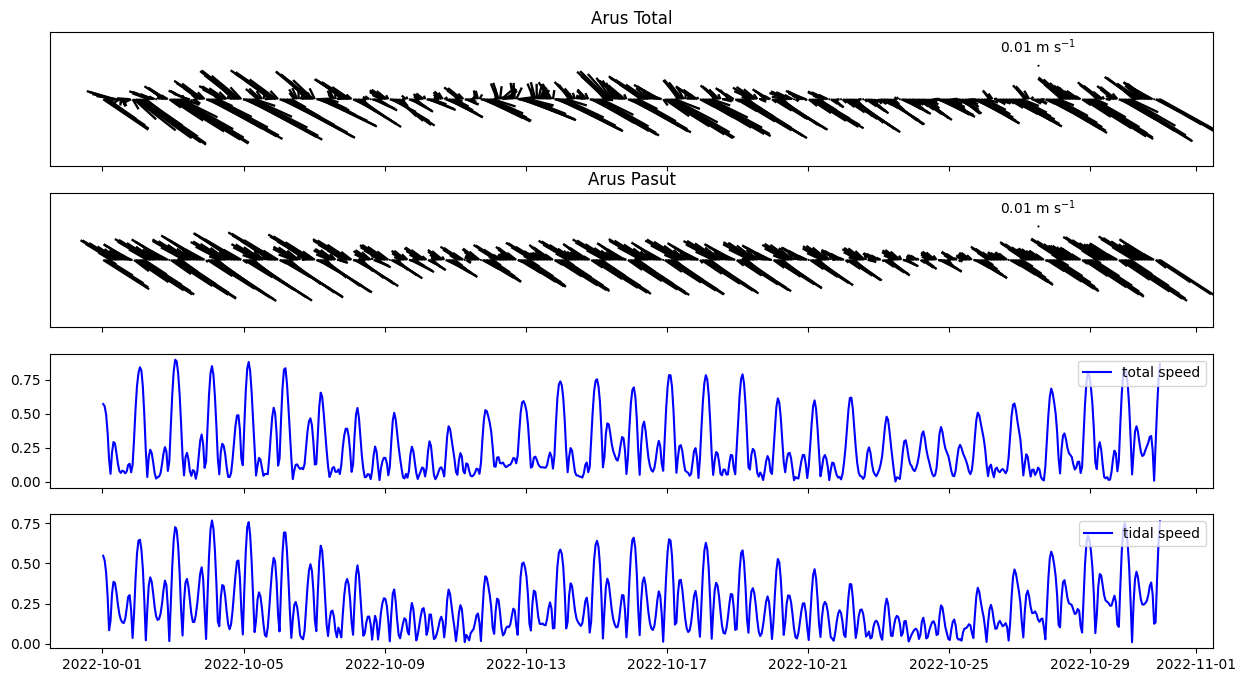

In [ ]:
import oceans.plotting as plot
import numpy as np
us = u1.sel(time=slice('2022-10-01T00:30:00.000000000','2022-10-30T23:30:00.000000000'))
vs = v1.sel(time=slice('2022-10-01T00:30:00.000000000','2022-10-30T23:30:00.000000000'))
us1 = u.sel(time=slice('2022-10-01T00:30:00.000000000','2022-10-30T23:30:00.000000000'))
vs1 = v.sel(time=slice('2022-10-01T00:30:00.000000000','2022-10-30T23:30:00.000000000'))
ws = waktu.sel(time=slice('2022-10-01T00:30:00.000000000','2022-10-30T23:30:00.000000000'))

us = us.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs = vs.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
us1 = us1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')
vs1 = vs1.sel(latitude= -2.083384, longitude=105.249734, method='nearest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 8),sharex=True)
q = plot.stick_plot(ws, us, vs, ax=ax0)
qk = ax0.quiverkey(q, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

q2 = plot.stick_plot(ws, us1, vs1, ax=ax1)
qk = ax1.quiverkey(q2, 0.850, 0.75, 0.01, "0.01 m s$^{-1}$",labelpos='N', coordinates='axes')

l = ax2.plot(ws, np.sqrt(us**2 + vs**2), "-b", label='total speed')
l2 = ax3.plot(ws, np.sqrt(us1**2 + vs1**2), "-b", label='tidal speed')
ax0.set_title('Arus Total', loc='center')
ax1.set_title('Arus Pasut', loc='center')
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import getpass
import pandas as pd

%matplotlib inline

In [ ]:
USERNAME = 'yahmadi'
PASSWORD = getpass.getpass('Enter your password: ')
DATASET_ID = 'cmems_mod_glo_wav_anfc_0.083deg_PT3H-i'
#cmems_mod_glo_phy-so_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy-cur_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m
#cmems_mod_glo_phy_my_0.083_P1M-m

Enter your password: ··········


In [ ]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2022 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

In [ ]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [ ]:
ds = xr.open_dataset(data_store)
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, time: 7224)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2021-01-01T03:00:00 ... 2023-06-23
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    ...         ...
    VTM01_WW   (time, latitude, longitude) float32 ...
    VMDR_WW    (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    VMDR_SW2   (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VPED       (time, latitude, longitude) float32 ...
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230622-03:00:00
    time_coverage_end:     20230623-00:00:00
    date_created:          20230613-07:41:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

In [ ]:
ds = ds.drop_vars(['VHM0_WW','VTM01_SW1','VTM01_SW2','VTM10','VHM0_SW1','VHM0_SW2','VTPK','VSDX','VSDY','VTM02','VTM01_WW','VMDR_WW','VMDR_SW1','VMDR_SW2','VPED'])
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, time: 7224)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2021-01-01T03:00:00 ... 2023-06-23
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230622-03:00:00
    time_coverage_end:     20230623-00:00:00
    date_created:          20230613-07:41:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

In [ ]:
df2 = ds
#df_time = df2.sel(longitude=slice(104.323539, 106.722035), latitude=slice(-3.611028, -1.360058), time=slice('2020-01-01T00:00:00.000000000', '2023-12-31T12:00:00.000000000'), depth=4.940250e-01)
df_time = df2.sel(longitude=slice(104.323539, 106.722035), latitude=slice(-3.611028, -1.360058), time=slice('2022-01-01T00:00:00.000000000', '2022-12-31T12:00:00.000000000'))
#104.323539  -1.360058
#106.722035  -3.611028

In [ ]:
seasonal_data = df_time.groupby('time.season')
seasonal_average = seasonal_data.mean(dim='time')

In [ ]:
seasonal_average.to_dataframe().to_csv('data.csv')

import numpy as np
df = pd.read_csv('/content/data.csv')
df2 = df.dropna().drop(['depth'], axis=1)
data2 = df2[~df2['season'].isin(df2)]
data2 = data2.reset_index(drop=True)
# data2['speed(m/s)'] = data2.apply(lambda row: np.sqrt(row['uo']**2 + row['vo']**2), axis=1)
# data2['direction'] = data2.apply(lambda row: np.mod(180+180/np.pi*(np.arctan2(row['vo'], row['uo'])),360), axis=1)
data2.to_csv('Arcgis.csv')
import pandas as pd
df= pd.read_csv('/content/Arcgis.csv')
df2 = df.drop(['Unnamed: 0'], axis=1)
df2
values_to_drop = ['JJA', 'MAM', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Barat.csv')
values_to_drop = ['DJF', 'MAM', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Timur.csv')
values_to_drop = ['DJF', 'JJA', 'SON']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Peralihan1.csv')
values_to_drop = ['DJF', 'JJA', 'MAM']
data2 = df2[~df2['season'].isin(values_to_drop)]
data2 = data2.reset_index(drop=True)
data2.to_csv('Musim_Peralihan2.csv')

In [ ]:
pip install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


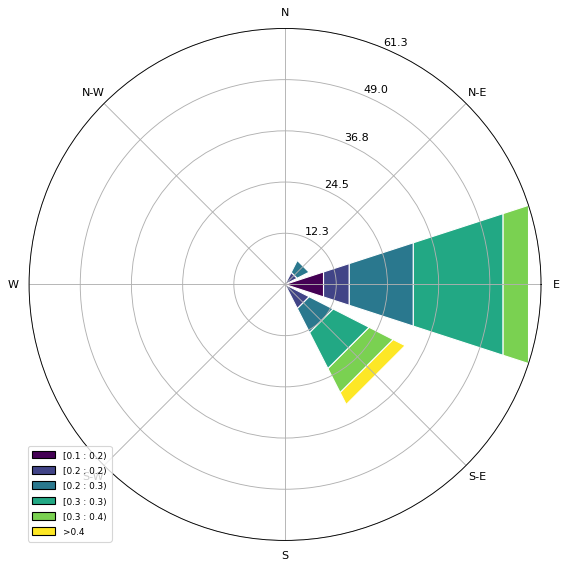

In [ ]:
tinggi = pd.read_csv('/content/Gelombang/tinggi gelombang pkkprl bangka_iup1546.csv')
arah = pd.read_csv('/content/Gelombang/arah gelombang pkkprl bangka_iup1546.csv')

A = arah.VMDR.loc[(arah['dayofyear'] <= 31)]
T = tinggi.VHM0.loc[(arah['dayofyear'] <= 31)]

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(A, T, normed=True, opening=0.8, edgecolor='white', nsector=8, blowto=True)
ax.set_legend()

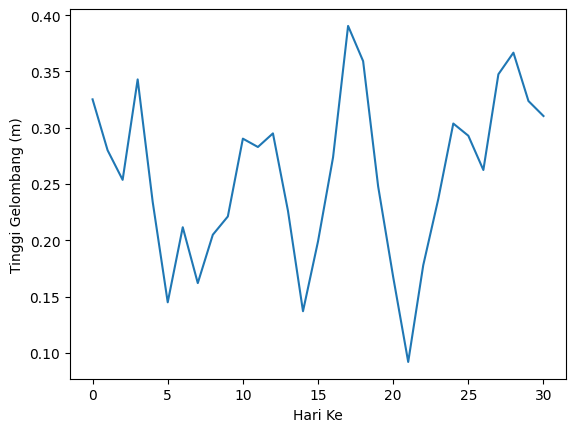

In [ ]:
import matplotlib.pyplot as plt
T.plot()
# Adding labels to the axes
plt.xlabel('Hari Ke')
plt.ylabel('Tinggi Gelombang (m)')
# Displaying the plot
plt.show()

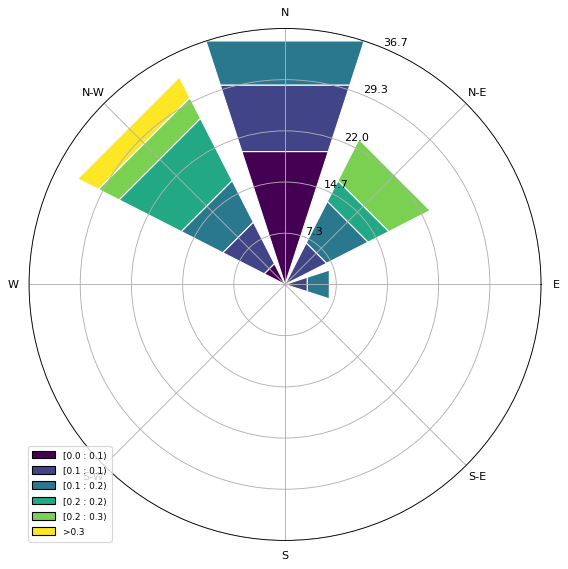

In [ ]:
A = arah.VMDR.loc[(arah['dayofyear'] >= 92) & (arah['dayofyear'] <= 121)]
T = tinggi.VHM0.loc[(arah['dayofyear'] >= 92) & (arah['dayofyear'] <= 121)]

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(A, T, normed=True, opening=0.8, edgecolor='white', nsector=8, blowto=True)
ax.set_legend()

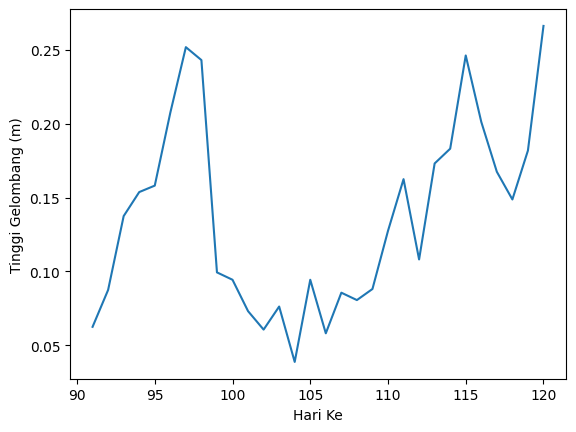

In [ ]:
import matplotlib.pyplot as plt
T.plot()
# Adding labels to the axes
plt.xlabel('Hari Ke')
plt.ylabel('Tinggi Gelombang (m)')
# Displaying the plot
plt.show()

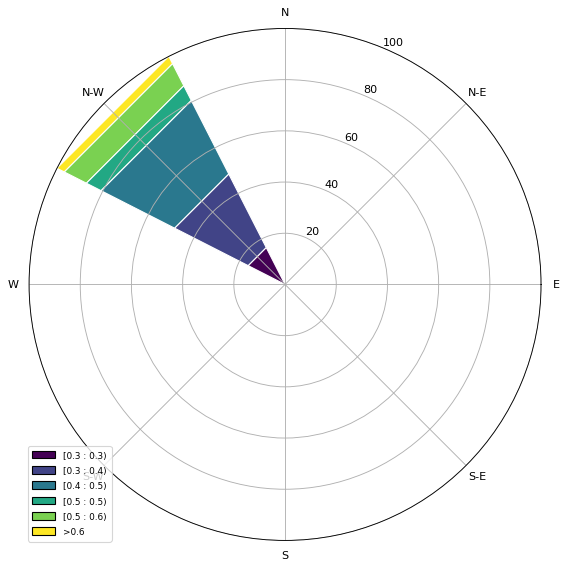

In [ ]:
A = arah.VMDR.loc[(arah['dayofyear'] >= 183) & (arah['dayofyear'] <= 213)]
T = tinggi.VHM0.loc[(arah['dayofyear'] >= 183) & (arah['dayofyear'] <= 213)]

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(A, T, normed=True, opening=0.8, edgecolor='white', nsector=8, blowto=True)
ax.set_legend()

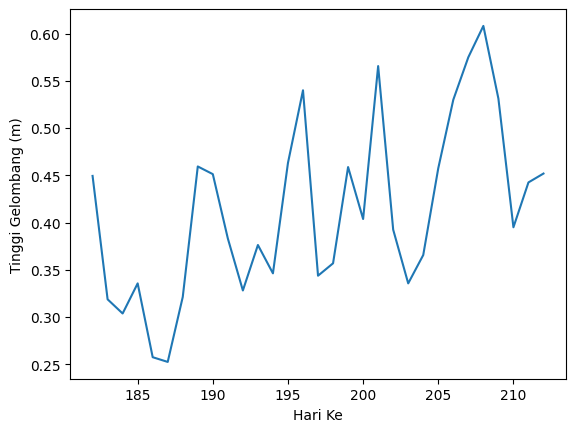

In [ ]:
import matplotlib.pyplot as plt
T.plot()
# Adding labels to the axes
plt.xlabel('Hari Ke')
plt.ylabel('Tinggi Gelombang (m)')
# Displaying the plot
plt.show()

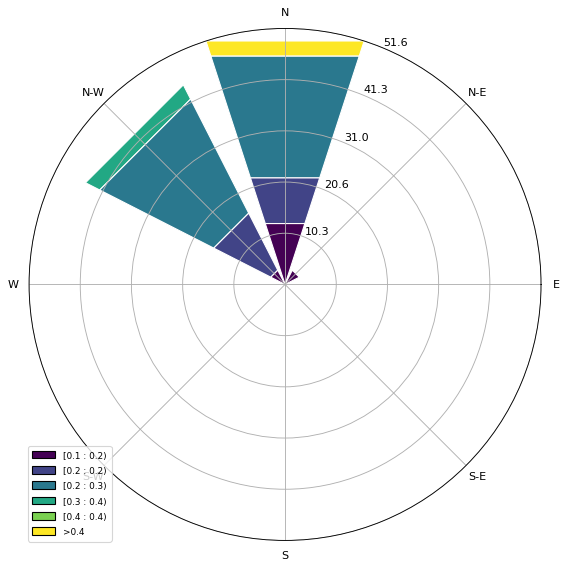

In [ ]:
A = arah.VMDR.loc[(arah['dayofyear'] >= 275) & (arah['dayofyear'] <= 305)]
T = tinggi.VHM0.loc[(arah['dayofyear'] >= 275) & (arah['dayofyear'] <= 305)]

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(A, T, normed=True, opening=0.8, edgecolor='white', nsector=8, blowto=True)
ax.set_legend()

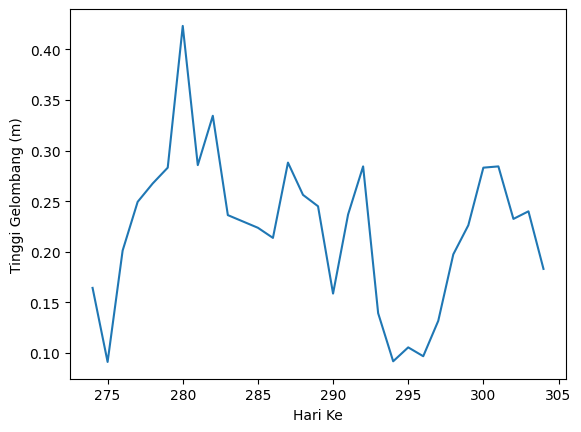

In [ ]:
import matplotlib.pyplot as plt
T.plot()
# Adding labels to the axes
plt.xlabel('Hari Ke')
plt.ylabel('Tinggi Gelombang (m)')
# Displaying the plot
plt.show()